In [36]:
#Импортирую библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [5]:
#Считываю данные
assessments = pd.read_csv('assessments.csv')
courses = pd.read_csv('courses.csv')
studentAssessment = pd.read_csv('studentAssessment.csv')
studentRegistration = pd.read_csv('studentRegistration.csv')

In [11]:

studentAssessment.shape

(173912, 5)

In [12]:
assessments.shape

(206, 6)

In [14]:
#Всего 173 null значения в оценках из 173912, не так много.
studentAssessment.isnull().sum()

id_assessment       0
id_student          0
date_submitted      0
is_banked           0
score             173
dtype: int64

In [17]:
#Нужно сджоинить таблицу с информацией об оценках в тесте с информацией о результатах тестирования студентов
full_assessment = studentAssessment.merge(assessments, how = 'left', on = 'id_assessment')

In [21]:
full_assessment.head()

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight
0,1752,11391,18,0,78.0,AAA,2013J,TMA,19.0,10.0
1,1752,28400,22,0,70.0,AAA,2013J,TMA,19.0,10.0
2,1752,31604,17,0,72.0,AAA,2013J,TMA,19.0,10.0
3,1752,32885,26,0,69.0,AAA,2013J,TMA,19.0,10.0
4,1752,38053,19,0,79.0,AAA,2013J,TMA,19.0,10.0


In [40]:
full_assessment.query("assessment_type == 'Exam'")

array(['CCC', 'DDD'], dtype=object)

In [27]:
#Посмотрю на то, какое количество студентов завершило модули
completed_modules = (full_assessment.query("assessment_type == 'Exam' and score >= 40")
                                   .groupby('code_module', as_index = False)
                                   .agg(students = ('id_student', 'nunique'))
                                   .sort_values('students', ascending = False))

In [28]:
#Можно увидеть, что есть всего 2 модуля c экзаменами. DDD успешно закончило 2706 студентов, CCC - 1683
completed_modules.head()

,code_module,students
1,DDD,2706
0,CCC,1683


In [33]:
#Теперь хочется понять какое количество тестов в семестре с разбивкой по предмету(модулю). 

assessments_count = (full_assessment.query("assessment_type !='Exam'") #Исключу экзамены, посмотрю только промежуточные
                                   .groupby(['code_presentation', 'code_module'],as_index = False)
                                   .agg(assessments_count = ('id_assessment', 'nunique'))
                                   .sort_values('assessments_count', ascending = False))

In [34]:
assessments_count.head()

,code_presentation,code_module,assessments_count
1,2013B,DDD,13
2,2013B,FFF,12
20,2014J,FFF,12
13,2014B,FFF,12
7,2013J,FFF,12


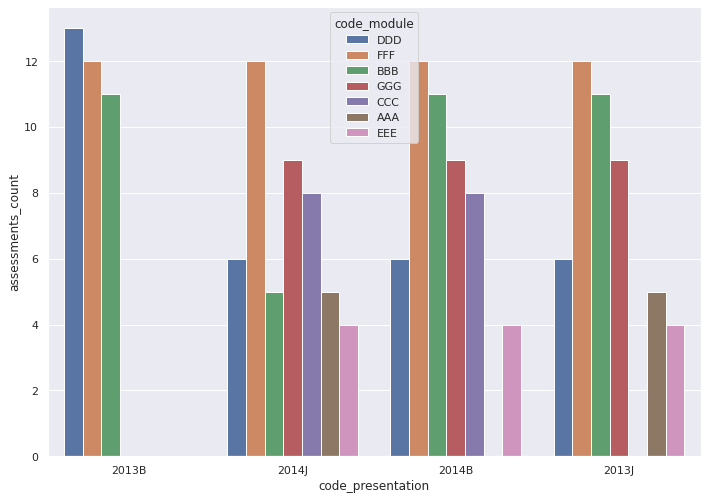

In [37]:
#Визуализирую полученную информацию
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(data = assessments_count,x = 'code_presentation', y = 'assessments_count', hue = 'code_module')

Можно заметить, что количество тестов по разным предметам по семестрам различается. Какие-то предметы (Например, DDD) являются базовыми и находятся во всех семестрах, какие-то предметы есть только в определенных семестрах. Выяснилось, что экзамены есть только в двух предметах (DDD, CCC)